In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

## Exploratory Data Analysis

For each data set:<br>
shape<br>
statistics<br>
data types<br>
correlation matrix<br>
plots<br>
missing values

In [3]:
demographics_df = pd.read_csv('../data/raw/denver_demographics.csv')
crime_df = pd.read_csv('../data/raw/denver_crime.csv')
school_df = pd.read_csv('../data/raw/denver_after_school_programs.csv')
equity_df = pd.read_csv('../data/raw/denver_equity_index.csv')

## Demographics

In [6]:
# demographics shape:
demographics_df.shape

(78, 151)

In [24]:
# demographics statistics
demographics_df.describe().T

,count,mean,std,min,25%,50%,75%,max
OBJECTID,78.0,1.955000e+02,2.266054e+01,1.570000e+02,1.762500e+02,1.955000e+02,2.147500e+02,2.340000e+02
Total Population All,78.0,9.061526e+03,6.971663e+03,7.170000e+02,4.658250e+03,7.845000e+03,1.042725e+04,4.380900e+04
Hispanic or Latino,78.0,2.667256e+03,3.809499e+03,1.380000e+02,6.235000e+02,1.379500e+03,3.133000e+03,2.312900e+04
White,78.0,4.890821e+03,3.462538e+03,8.800000e+01,2.359500e+03,4.288500e+03,6.714250e+03,2.002200e+04
Black,78.0,7.830513e+02,1.643527e+03,0.000000e+00,9.750000e+01,2.980000e+02,5.680000e+02,1.210000e+04
...,...,...,...,...,...,...,...,...
North America FB,78.0,2.732051e+01,3.388349e+01,0.000000e+00,0.000000e+00,1.300000e+01,4.200000e+01,1.320000e+02
Percent Living in Poverty,78.0,1.221002e+01,9.746016e+00,0.000000e+00,7.141667e+00,9.812500e+00,1.497500e+01,7.770000e+01
Percent Families in Poverty,78.0,8.851593e+00,1.043017e+01,0.000000e+00,2.315409e+00,6.305193e+00,1.153853e+01,7.538462e+01
Shape__Area,78.0,5.530582e+07,1.345033e+08,8.472190e+06,2.151083e+07,3.130095e+07,4.214880e+07,1.180864e+09


In [20]:
# demographics data types
demographics_df.dtypes

OBJECTID                         int64
Neighborhood Name               object
Total Population All             int64
Hispanic or Latino               int64
White                            int64
                                ...   
Percent Living in Poverty      float64
Percent Families in Poverty    float64
GlobalID                        object
Shape__Area                    float64
Shape__Length                  float64
Length: 151, dtype: object

In [39]:
# demographics correlation matrix - numeric only
numeric_demographics_df = demographics_df.select_dtypes(include='number')
numeric_demographics_df.corr()

,OBJECTID,Total Population All,Hispanic or Latino,White,Black,Native American,Asian,Hawaiian/Pacific Islander,Other Race,Two or More,...,Americas FB,Latin America FB,Carribean FB,Central America FB,South America FB,North America FB,Percent Living in Poverty,Percent Families in Poverty,Shape__Area,Shape__Length
OBJECTID,1.000000,0.039858,-0.000801,0.085535,-0.000464,0.041999,0.021295,-0.236069,0.016704,-0.062231,...,0.012385,0.009810,0.126646,0.004694,-0.022264,0.105130,-0.047930,-0.025321,-0.048210,0.029918
Total Population All,0.039858,1.000000,0.750386,0.616938,0.809601,0.474122,0.823188,0.198540,0.690404,0.716045,...,0.719398,0.709509,0.468863,0.669650,0.676866,0.373329,-0.105567,-0.062127,0.120312,0.297009
Hispanic or Latino,-0.000801,0.750386,1.000000,-0.016746,0.682441,0.546744,0.493551,0.217672,0.474568,0.261009,...,0.982815,0.983006,0.414809,0.978852,0.447766,-0.052487,0.147676,0.205580,0.088857,0.161113
White,0.085535,0.616938,-0.016746,1.000000,0.246234,0.169650,0.571459,0.060271,0.390250,0.717895,...,-0.058470,-0.074321,0.173681,-0.117905,0.384890,0.653418,-0.327184,-0.329154,0.006758,0.194845
Black,-0.000464,0.809601,0.682441,0.246234,1.000000,0.235685,0.740610,0.124163,0.698443,0.557213,...,0.690749,0.686089,0.497551,0.639721,0.723353,0.159961,-0.024765,0.017952,0.208708,0.301816
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
North America FB,0.105130,0.373329,-0.052487,0.653418,0.159961,0.111257,0.317088,-0.034254,0.191141,0.412493,...,-0.033247,-0.057567,0.357979,-0.106577,0.327835,1.000000,-0.308117,-0.297706,-0.014917,0.043907
Percent Living in Poverty,-0.047930,-0.105567,0.147676,-0.327184,-0.024765,0.154645,-0.143307,-0.096031,-0.065718,-0.209311,...,0.132439,0.139797,-0.053017,0.157971,-0.096779,-0.308117,1.000000,0.891279,-0.092722,-0.110237
Percent Families in Poverty,-0.025321,-0.062127,0.205580,-0.329154,0.017952,0.181953,-0.126894,-0.049491,-0.015813,-0.189193,...,0.194379,0.201415,-0.045231,0.219644,-0.058999,-0.297706,0.891279,1.000000,0.045263,0.025284
Shape__Area,-0.048210,0.120312,0.088857,0.006758,0.208708,0.034996,0.203866,0.012537,0.089273,0.120075,...,0.097240,0.097496,0.087701,0.091759,0.078710,-0.014917,-0.092722,0.045263,1.000000,0.916965


In [54]:
# demographics plots
# demographics_df.hist(bins= 50, figsize= (14, 10))
# plt.show()

In [7]:
# demographics missing values:
for feature in demographics_df.columns:
    null_sum = demographics_df[feature].isna().sum()
    if null_sum > 0:
        print(f'{feature}: {null_sum} null')

## Crime

In [21]:
# crime shape:
crime_df.shape

(358692, 23)

In [23]:
# crime statistics
crime_df.describe().T

,count,mean,std,min,25%,50%,75%,max
OBJECTID,358692.0,1.839814e+05,1.059657e+05,1.000000e+00,9.397975e+04,1.836525e+05,2.751722e+05,3.678920e+05
INCIDENT_ID,358692.0,6.707744e+09,1.347193e+10,2.020600e+04,2.021225e+09,2.023226e+09,2.020601e+10,2.024924e+12
OFFENSE_ID,358692.0,6.707744e+15,1.347193e+16,2.020652e+10,2.021225e+15,2.023226e+15,2.020601e+16,2.024924e+18
OFFENSE_CODE,358692.0,2.758259e+03,1.160120e+03,9.020000e+02,2.304000e+03,2.399000e+03,2.999000e+03,7.399000e+03
OFFENSE_CODE_EXTENSION,358692.0,2.355057e-01,6.549585e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
GEO_X,358692.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
GEO_Y,358692.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
GEO_LON,358439.0,-1.049413e+02,9.795205e-01,-1.154641e+02,-1.050000e+02,-1.049772e+02,-1.049061e+02,5.300000e-07
GEO_LAT,358439.0,3.973244e+01,3.721786e-01,4.000000e-08,3.970960e+01,3.974006e+01,3.976279e+01,3.991402e+01
PRECINCT_ID,358692.0,3.859944e+02,1.842470e+02,1.110000e+02,2.220000e+02,3.230000e+02,5.230000e+02,9.990000e+02


In [25]:
# crime data types
crime_df.dtypes

OBJECTID                    int64
INCIDENT_ID                 int64
OFFENSE_ID                  int64
OFFENSE_CODE                int64
OFFENSE_CODE_EXTENSION      int64
OFFENSE_TYPE_ID            object
OFFENSE_CATEGORY_ID        object
FIRST_OCCURRENCE_DATE      object
LAST_OCCURRENCE_DATE       object
REPORTED_DATE              object
INCIDENT_ADDRESS           object
GEO_X                       int64
GEO_Y                       int64
GEO_LON                   float64
GEO_LAT                   float64
DISTRICT_ID                object
PRECINCT_ID                 int64
NEIGHBORHOOD_ID            object
IS_CRIME                    int64
IS_TRAFFIC                  int64
VICTIM_COUNT                int64
x                         float64
y                         float64
dtype: object

In [40]:
# crime correlation matrix - numeric only
numeric_crime_df = crime_df.select_dtypes(include='number')
numeric_crime_df.corr()

,OBJECTID,INCIDENT_ID,OFFENSE_ID,OFFENSE_CODE,OFFENSE_CODE_EXTENSION,GEO_X,GEO_Y,GEO_LON,GEO_LAT,PRECINCT_ID,IS_CRIME,IS_TRAFFIC,VICTIM_COUNT,x,y
OBJECTID,1.000000,-0.005594,-0.005594,-0.085883,-0.027953,NaN,NaN,0.010367,0.000006,0.011984,NaN,NaN,-0.005813,0.009145,0.011948
INCIDENT_ID,-0.005594,1.000000,1.000000,-0.062695,0.035637,NaN,NaN,0.009599,0.004228,0.040390,NaN,NaN,-0.029654,0.008007,0.012313
OFFENSE_ID,-0.005594,1.000000,1.000000,-0.062695,0.035637,NaN,NaN,0.009599,0.004228,0.040390,NaN,NaN,-0.029654,0.008007,0.012313
OFFENSE_CODE,-0.085883,-0.062695,-0.062695,1.000000,0.037302,NaN,NaN,-0.002523,0.003618,0.059343,NaN,NaN,-0.105611,-0.001866,0.007136
OFFENSE_CODE_EXTENSION,-0.027953,0.035637,0.035637,0.037302,1.000000,NaN,NaN,0.003526,0.004377,0.028374,NaN,NaN,0.152373,0.002832,0.007702
GEO_X,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GEO_Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GEO_LON,0.010367,0.009599,0.009599,-0.002523,0.003526,NaN,NaN,1.000000,-0.984496,0.032028,NaN,NaN,-0.000888,0.999837,0.986496
GEO_LAT,0.000006,0.004228,0.004228,0.003618,0.004377,NaN,NaN,-0.984496,1.000000,0.021489,NaN,NaN,0.001226,-0.986884,-0.953320
PRECINCT_ID,0.011984,0.040390,0.040390,0.059343,0.028374,NaN,NaN,0.032028,0.021489,1.000000,NaN,NaN,0.003768,0.025946,0.043630


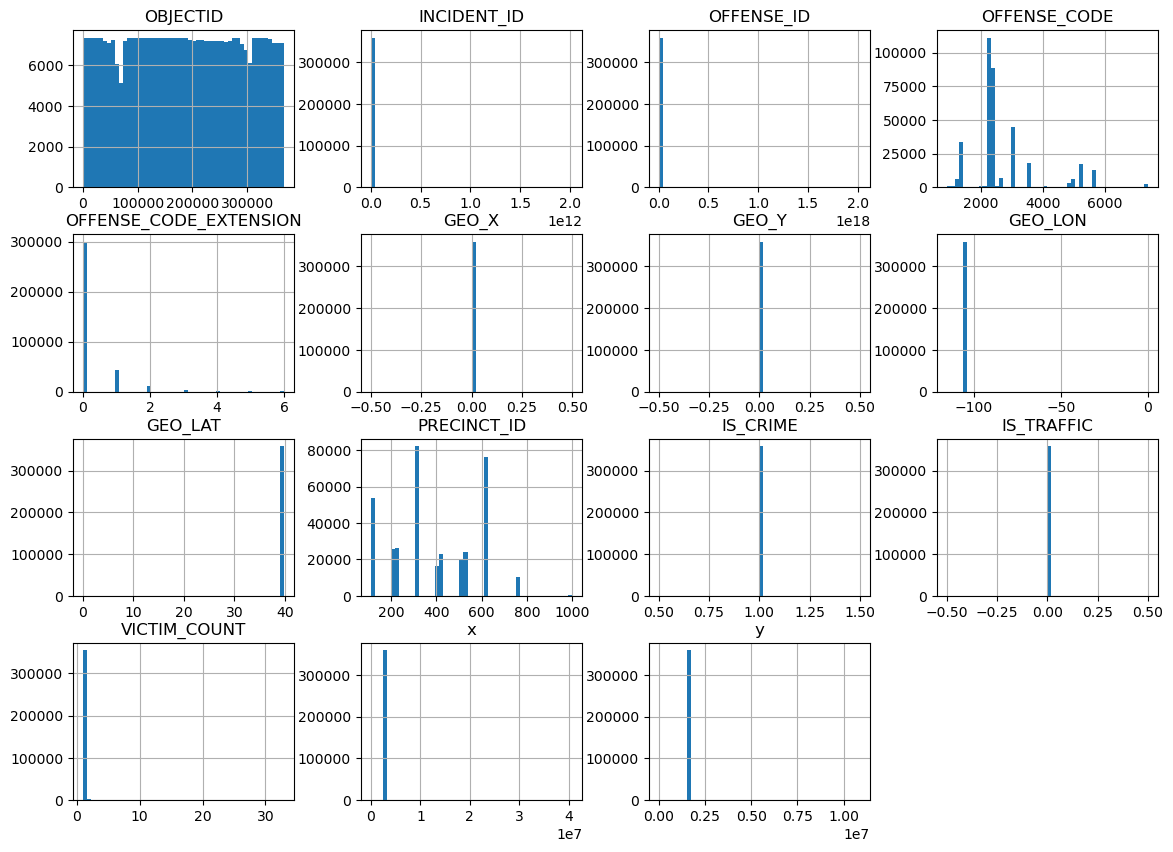

In [49]:
# crime plots
crime_df.hist(bins= 50, figsize= (14, 10))
plt.show()

In [28]:
# crime missing values:
for feature in crime_df.columns:
    null_sum = crime_df[feature].isna().sum()
    if null_sum > 0:
        print(f'{feature}: {null_sum} null')

LAST_OCCURRENCE_DATE: 158314 null
GEO_LON: 253 null
GEO_LAT: 253 null
DISTRICT_ID: 37 null
NEIGHBORHOOD_ID: 513 null
x: 253 null
y: 253 null


In [5]:
crime_df.loc[0]

OBJECTID                                           1
INCIDENT_ID                               2020454617
OFFENSE_ID                          2020454617299900
OFFENSE_CODE                                    2999
OFFENSE_CODE_EXTENSION                             0
OFFENSE_TYPE_ID              criminal-mischief-other
OFFENSE_CATEGORY_ID                  public-disorder
FIRST_OCCURRENCE_DATE          7/26/2020 11:00:00 PM
LAST_OCCURRENCE_DATE                             NaN
REPORTED_DATE                   7/28/2020 5:09:00 AM
INCIDENT_ADDRESS                 15987 E RANDOLPH PL
GEO_X                                              0
GEO_Y                                              0
GEO_LON                                  -104.801111
GEO_LAT                                    39.797827
DISTRICT_ID                                        5
PRECINCT_ID                                      522
NEIGHBORHOOD_ID           gateway-green-valley-ranch
IS_CRIME                                      

## After School Programs

In [29]:
# after school programs shape:
school_df.shape

(27379, 253)

In [30]:
# after school statistics
school_df.describe().T

,count,mean,std,min,25%,50%,75%,max
OBJECTID,27379.0,1.369000e+04,7.903781e+03,1.000000e+00,6.845500e+03,1.369000e+04,2.053450e+04,2.737900e+04
ORG_ID,27379.0,3.681874e+04,1.026302e+03,3.529700e+04,3.648000e+04,3.648000e+04,3.656800e+04,4.307900e+04
SITE_ID,27379.0,1.325652e+05,8.455550e+03,1.150250e+05,1.269420e+05,1.324430e+05,1.342070e+05,1.505530e+05
GLOBAL_SITEID,27379.0,1.267804e+05,7.669866e+03,1.238980e+05,1.243200e+05,1.244940e+05,1.246450e+05,1.633980e+05
GLOBAL_ZIP,27284.0,7.910843e+04,9.364275e+03,0.000000e+00,8.020900e+04,8.021900e+04,8.023000e+04,8.091800e+04
...,...,...,...,...,...,...,...,...
GLOBAL_LONG,27284.0,-1.033199e+02,1.375165e+01,-1.059414e+02,-1.050281e+02,-1.049705e+02,-1.049097e+02,1.051226e+02
GLOBAL_CONTACT_PH,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DPS_SCHOOL_NUM,19664.0,2.536383e+02,7.204032e+01,1.450000e+02,2.100000e+02,2.440000e+02,2.790000e+02,7.500000e+02
x,27283.0,3.647769e+06,4.448396e+06,-2.246999e+07,3.132740e+06,3.148696e+06,3.165979e+06,4.067477e+07


In [31]:
# after school data types
school_df.dtypes

OBJECTID                  int64
ORG_ID                    int64
SITE_ID                   int64
GLOBAL_SITEID             int64
GLOBAL_LOCATION_TYPE     object
                         ...   
GLOBAL_LONG             float64
GLOBAL_CONTACT_PH       float64
DPS_SCHOOL_NUM          float64
x                       float64
y                       float64
Length: 253, dtype: object

In [41]:
# after school correlation matrix - numeric only
numeric_school_df = school_df.select_dtypes(include='number')
numeric_school_df.corr()

,OBJECTID,ORG_ID,SITE_ID,GLOBAL_SITEID,GLOBAL_ZIP,LICENSED_TYPE,REG_FORM_REQD,REG_FORM_ONLINE,TRANSPORT_AVAIL,PROVIDE_FOOD,...,ORG_MAIN_CITY,ORG_MAIN_STATE,ORG_MAIN_ZIP,GLOBAL_ADDR_ID,GLOBAL_LAT,GLOBAL_LONG,GLOBAL_CONTACT_PH,DPS_SCHOOL_NUM,x,y
OBJECTID,1.000000,0.071112,0.039776,0.017391,0.025757,NaN,NaN,NaN,0.037475,-0.104436,...,NaN,NaN,NaN,-0.007818,0.025154,-0.017404,NaN,-0.043242,-0.027946,-0.013036
ORG_ID,0.071112,1.000000,0.220347,0.409137,-0.038273,NaN,NaN,NaN,0.133426,-0.173698,...,NaN,NaN,NaN,-0.017552,-0.037599,0.022948,NaN,0.137472,0.041246,0.017105
SITE_ID,0.039776,0.220347,1.000000,0.298810,0.043969,NaN,NaN,NaN,0.032448,-0.445558,...,NaN,NaN,NaN,0.051732,0.045167,-0.010798,NaN,0.037549,-0.053672,0.004709
GLOBAL_SITEID,0.017391,0.409137,0.298810,1.000000,-0.009620,NaN,NaN,NaN,0.046987,-0.237850,...,NaN,NaN,NaN,0.294593,-0.012638,0.065730,NaN,-0.095908,-0.012481,0.084700
GLOBAL_ZIP,0.025757,-0.038273,0.043969,-0.009620,1.000000,NaN,NaN,NaN,0.009896,0.125420,...,NaN,NaN,NaN,0.125295,0.982545,-0.889618,NaN,-0.009662,-0.985183,-0.796499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GLOBAL_LONG,-0.017404,0.022948,-0.010798,0.065730,-0.889618,NaN,NaN,NaN,-0.010163,-0.126705,...,NaN,NaN,NaN,0.008128,-0.885523,1.000000,NaN,-0.033142,0.800656,0.983928
GLOBAL_CONTACT_PH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DPS_SCHOOL_NUM,-0.043242,0.137472,0.037549,-0.095908,-0.009662,NaN,NaN,NaN,0.119120,-0.213549,...,NaN,NaN,NaN,0.077652,-0.069754,-0.033142,NaN,1.000000,-0.032927,-0.069701
x,-0.027946,0.041246,-0.053672,-0.012481,-0.985183,NaN,NaN,NaN,-0.008966,-0.117470,...,NaN,NaN,NaN,0.010867,-0.985256,0.800656,NaN,-0.032927,1.000000,0.681179


In [52]:
# after school plots
# school_df.hist(bins= 50, figsize= (14, 10))
# plt.show()

In [32]:
# after school programs missing values:
for feature in school_df.columns:
    null_sum = school_df[feature].isna().sum()
    if null_sum > 0:
        print(f'{feature}: {null_sum} null')

GLOBAL_LOCATION_NAME: 95 null
GLOBAL_STREET_ADDR: 95 null
GLOBAL_CITY: 95 null
GLOBAL_STATE: 95 null
GLOBAL_ZIP: 95 null
LICENSED_TYPE: 27379 null
REG_FORM_REQD: 27379 null
REG_FORM_ONLINE: 27379 null
REG_FORM_WEBSITE: 8462 null
REG_PROCESS: 4972 null
TRANSPORT_AVAIL: 29 null
PROVIDE_FOOD: 29 null
PROVIDE_SNACKS: 12495 null
PROVIDE_BRKFST: 26934 null
PROVIDE_LUNCH: 26098 null
PROVIDE_DINNER: 26689 null
PROVIDE_WKND_BKPKS: 27356 null
FOCUSAREA_NAME: 996 null
FOCUSAREA_STATUS: 996 null
FOCUSAREA_DESC: 997 null
FOCUSAREA_CONTACT_FIRSTNAME: 27379 null
FOCUSAREA_CONTACT_LASTNAME: 27379 null
FOCUSAREA_CONTACT_PH: 997 null
FOCUSAREA_CONTACT_EMAIL: 996 null
TIME_BEFSCHOOL: 20187 null
TIME_AFTERSCHOOL: 8769 null
TIME_SUMMER: 19379 null
TIME_HOLIDAY: 23964 null
TIME_SCHOOLDAY: 26385 null
TIME_BYREQUEST: 24062 null
COST_FREE: 996 null
COST_FEE_FAM: 27379 null
COST_FEE_FAM_SCHOL: 27379 null
COST_FEE_ORG: 27379 null
COST_FEE_HOST: 27379 null
PFA_ACAD: 9459 null
PFA_ARTS: 8914 null
PFA_COLLEGE_CAREE

## Equity Scores

In [14]:
# equity shape:
equity_df.shape

(78, 11)

In [33]:
# equity statistics 
equity_df.describe().T

,count,mean,std,min,25%,50%,75%,max
OBJECTID_1,78.0,3.950000e+01,2.266054e+01,1.000000e+00,2.025000e+01,3.950000e+01,5.875000e+01,7.800000e+01
avgsocioeconscore,78.0,3.025641e+00,1.309053e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
avgAccessToCareScore,78.0,3.025641e+00,1.245505e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
avgMobidityScore,78.0,3.025641e+00,7.724873e-01,1.500000e+00,2.500000e+00,3.000000e+00,3.500000e+00,5.000000e+00
mortalityscore,78.0,3.025641e+00,1.423133e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00
avgBuiltEnvScore,78.0,3.025641e+00,1.037909e+00,1.000000e+00,2.500000e+00,3.000000e+00,3.875000e+00,5.000000e+00
avgOverallEquityScore,78.0,3.025641e+00,8.297137e-01,1.600000e+00,2.300000e+00,3.100000e+00,3.675000e+00,4.700000e+00
Shape__Area,78.0,5.531185e+07,1.345773e+08,8.472228e+06,2.149205e+07,3.130152e+07,4.209081e+07,1.181287e+09
Shape__Length,78.0,3.098628e+04,2.397469e+04,1.248760e+04,1.990556e+04,2.541847e+04,3.422891e+04,1.987123e+05


In [34]:
# equity data types
equity_df.dtypes

OBJECTID_1                 int64
NBHD_NAME                 object
GLOBALID                  object
avgsocioeconscore        float64
avgAccessToCareScore     float64
avgMobidityScore         float64
mortalityscore             int64
avgBuiltEnvScore         float64
avgOverallEquityScore    float64
Shape__Area              float64
Shape__Length            float64
dtype: object

In [42]:
# equity correlation matrix - numeric only
numeric_equity_df = equity_df.select_dtypes(include='number')
numeric_equity_df.corr()

,OBJECTID_1,avgsocioeconscore,avgAccessToCareScore,avgMobidityScore,mortalityscore,avgBuiltEnvScore,avgOverallEquityScore,Shape__Area,Shape__Length
OBJECTID_1,1.000000,-0.536312,-0.528245,-0.120559,-0.428887,-0.065433,-0.513768,0.227931,0.208544
avgsocioeconscore,-0.536312,1.000000,0.859853,0.439208,0.644477,0.150057,0.914101,0.037376,0.028157
avgAccessToCareScore,-0.528245,0.859853,1.000000,0.292891,0.549139,0.084878,0.835697,-0.016885,-0.008235
avgMobidityScore,-0.120559,0.439208,0.292891,1.000000,0.365607,0.149000,0.575425,0.016905,-0.032622
mortalityscore,-0.428887,0.644477,0.549139,0.365607,1.000000,-0.009243,0.777033,0.183685,0.222302
avgBuiltEnvScore,-0.065433,0.150057,0.084878,0.149000,-0.009243,1.000000,0.347591,-0.293824,-0.411722
avgOverallEquityScore,-0.513768,0.914101,0.835697,0.575425,0.777033,0.347591,1.000000,-0.000626,-0.026410
Shape__Area,0.227931,0.037376,-0.016885,0.016905,0.183685,-0.293824,-0.000626,1.000000,0.916726
Shape__Length,0.208544,0.028157,-0.008235,-0.032622,0.222302,-0.411722,-0.026410,0.916726,1.000000


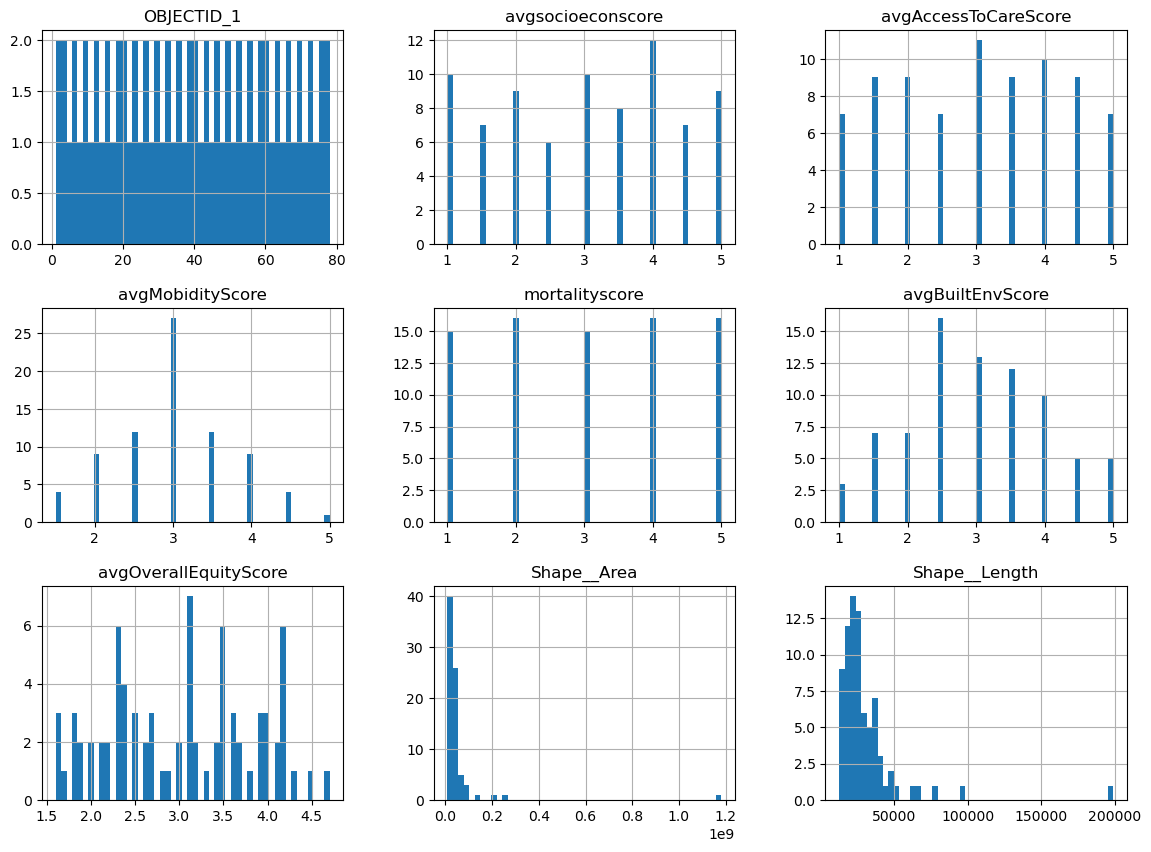

In [53]:
# equity plots
equity_df.hist(bins= 50, figsize= (14, 10))
plt.show()

In [35]:
# equity missing values:
for feature in equity_df.columns:
    null_sum = equity_df[feature].isna().sum()
    if null_sum > 0:
        print(f'{feature}: {null_sum} null')

In [38]:
# value counts for output variable to determine tiers - low, medium, high
equity_df["avgOverallEquityScore"].value_counts()

avgOverallEquityScore
3.1    7
4.2    6
3.5    6
2.3    6
2.4    4
4.0    3
1.6    3
3.6    3
2.7    3
2.5    3
1.8    3
3.9    3
3.0    2
2.1    2
2.2    2
2.6    2
3.7    2
3.4    2
4.1    2
1.9    2
2.0    2
3.2    2
4.3    1
4.7    1
1.7    1
2.8    1
4.5    1
3.8    1
3.3    1
2.9    1
Name: count, dtype: int64